# The Visibility Function
##### Julien Girard  (contact: julien.girard@obspm.fr)

In this practical notebook, we will play around with a simplified version of the ZVC Theorem.

**Zernicke-Van Cittert theorem**

$$\boxed{\boxed{\mathcal{ V }(u,v,w) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(l,m)I_\nu(l,m) \exp \left[ {-\imath 2\pi (ul+vm+w(\sqrt{1-l^2-m^2}-1)) }\right] \frac{dl dm}{\sqrt{1 - l^2 - m^2}}}}$$

**simplifies to**


$$\boxed{\boxed{V_{pq}(u,v,0)=\int_{-\infty}^\infty\int_{-\infty}^\infty{I_\nu e^{-2\imath\pi (ul+vm)}dldm}}}$$

--------

## 0. Initializing environment and relevant variables


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Npoints=512
l=np.arange(-1,1.,2./512)
m=l.copy()

ll,mm=np.meshgrid(l,m)  # Generating a (l,m) grid of the sky.

## 1. Sky brightness distributions

##### First, we are going to generate typical sky brightness distributions to play around.

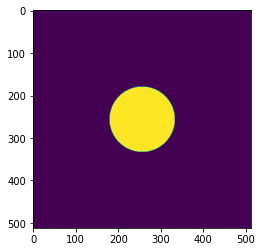

In [2]:
# make a filled disk
rad=0.3 # in (l,m) units
llc=0  # center of source (l,m) units
mmc=0

Ir=np.sqrt(((ll-llc)**2+(mm-mmc)**2)) <= rad
plt.imshow(Ir)

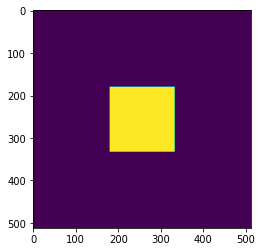

In [3]:
# Make a square
rad=0.3 # in (l,m) units
llc=0  # center of source (l,m) units
mmc=0
Ic=np.logical_and(np.abs(ll-llc)<= rad,np.abs(mm-mmc)<= rad)
plt.imshow(Ic)

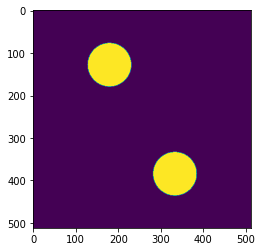

In [90]:
# make two point sources
rad=0.2 # in (l,m) units
llc=0.3  # center of source (l,m) units
mmc=0.5

Ir1=np.sqrt(((ll-llc)**2+(mm-mmc)**2)) <= rad
Ir2=np.sqrt(((ll+llc)**2+(mm+mmc)**2)) <= rad

IrT=np.logical_or(Ir1,Ir2)
plt.imshow(IrT)

## 2. Computing the (simplified) exponent factor (u=1,v=0)

##### TODO 1: Write the expression of K, the simplified exponent term from the VCZ theorem. 
##### TODO 2: Play around with values of u and v and represent the corresponding fringe pattern over the sky

Text(0.5, 1.0, 'Fringe pattern')

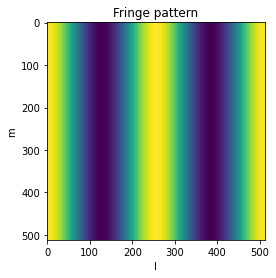

In [91]:
u=1
v=0
K=np.exp(-2j*np.pi*(u*ll + v*mm)) ## fill with the right expression 
plt.imshow(np.real(K))
plt.xlabel('l')
plt.ylabel('m')
plt.title('Fringe pattern')

Text(0.5, 1.0, 'Fringe pattern')

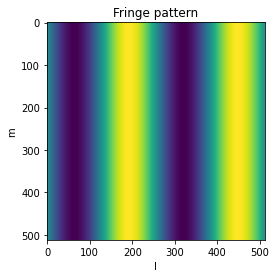

In [92]:
plt.imshow(np.imag(K))
plt.xlabel('l')
plt.ylabel('m')
plt.title('Fringe pattern')

## 3. Computing the visibility by combining the sky with the fringe pattern

##### TODO 1: With K and the sky brightness, compute the visibility for
##### TODO 2: What are the typical range of values for various values of u ?

In [93]:
Vis=np.sum(IrT*K)
Vis

(-4150.660833737917+1.5631940186722204e-13j)

## 4. Scanning all possible u in 1 direction

##### TODO 1: Use the following code to compute the visibility values for u=[0..10] and plot them as a function of u

In [105]:
tabVis=[]
tabu=[]
Npts=100
u=np.arange(0,10,10./Npts)
v=0
for iu in range(Npts):
    tmpK=np.real(np.exp(-2*1j*np.pi*(u[iu]*ll+v*mm)))
    tmpVis=np.sum(IrT*tmpK)
    tabVis.append(tmpVis)
    tabu.append(u[iu])

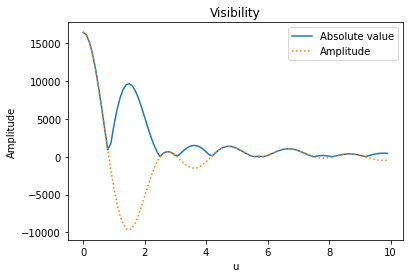

In [106]:
plt.plot(tabu,np.abs(tabVis),label="Absolute value")
plt.plot(tabu,tabVis,label="Amplitude",linestyle=":")
plt.title('Visibility')
plt.xlabel('u')
plt.ylabel('Amplitude')
plt.legend()

##### TODO 2: What is the shape of the visibility function for various sky brightness distribution?

## 5. Scanning possible u in 2 directions

##### TODO 1: Now we will scan both u and v in the [-10,10] range. The following block has been filled in advanced. Plot the Visibility function and discuss its shape regarding the corresponding sky.


In [96]:
tabVis=[]
tabu=[]

umin=-10
vmin=-10
umax=10
vmax=10
Npts=64

u=np.arange(umin,umax,(umax-umin)/Npts)
v=np.arange(umin,umax,(vmax-vmin)/Npts)
uu,vv=np.meshgrid(u,v)

Visplane=np.zeros((Npts,Npts))

In [97]:
# Lazy, non-pythonic version
for iv in range(Npts):
    for iu in range(Npts):
        tmpK=np.real(np.exp(-2j*np.pi*(uu[iu,iv]*ll+vv[iu,iv]*mm)))
        tmpVis=np.sum(IrT*tmpK)
        Visplane[iu,iv]=tmpVis

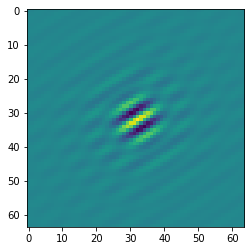

In [98]:
plt.imshow(Visplane)

##### TODO 2: Compute the Fourier Transform of the sky brightness  and compare its shape to the previous map.

(210.0, 300.0)

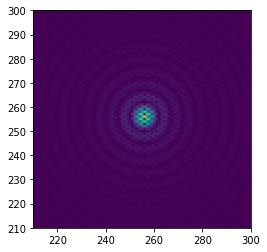

In [102]:
from numpy.fft import fft2,fftshift
tf=fftshift(fft2(IrT))
plt.imshow(np.abs(tf))
plt.xlim([210,300])
plt.ylim([210,300])